# Steady flow through a duct with heat transfer
This notebook demonstrates the use of tools for computing steady compressible flow
through a constant-area duct with heat transfer, commonly known as **Rayleigh flow**.

### Set up the module

In [1]:
using Gasdynamics1D

In [2]:
using Plots
using LaTeXStrings

#### Simple example
In a duct with helium, if the flow enters with stagnation temperature of 20 degrees C,
how much does the stagnation temperature change if we add heat 400 kJ/kg?

In [3]:
q = HeatFlux(400u"kJ/kg")
T01 = StagnationTemperature(20u"°C")

StagnationTemperature = 293.15 K

starting stagnation enthalpy

In [4]:
h01 = StagnationEnthalpy(T01,gas=He) # h01 = cp*T01

StagnationEnthalpy = 1.5223751427893795e6 J kg⁻¹

add the heat

In [5]:
h02 = StagnationEnthalpy(h01 + q)

StagnationEnthalpy = 1.9223751427893795e6 J kg⁻¹

calculate the final stagnation temperature

In [6]:
T02 = StagnationTemperature(h02,gas=He)  # T02 = h02/cp

StagnationTemperature = 370.17437901419606 K

Report the final value in Celsius:

In [7]:
value(T02,u"°C")

97.02437901419609 °C

so the flow exiting the duct has stagnation temperature 97 C.

The sonic state is used as a reference, similar to Fanno flow and isentropic flow.
All states share the same $T_{0}^*$, $p^*$, $u^*$, etc, so we can relate two points
via this reference. We have functions that allow us to do this. For example, to
find the ratio of the local stagnation temperature to its sonic reference value
at Mach number 0.5 in air:

In [8]:
T0OverT0Star(MachNumber(0.5),RayleighFlow,gas=Air)

TemperatureRatio = 0.691358024691358

Note that the argument `RayleighFlow` was used to designate this function's use.
If the Mach number is 1, then...

In [9]:
T0OverT0Star(MachNumber(1),RayleighFlow,gas=Air)

TemperatureRatio = 1.0

That is, $T_{0}$ is equal to $T_{0}^*$ when Mach number is 1, as it should be,
by definition.
Alternatively, if we know $T_0/T_0^*$, we can determine $M$. However, there are
sometimes two possible values of Mach number, as with Fanno flow and isentropic flow.

In [10]:
Mrange = range(0.001,8,length=801)
T0_over_T0star = []
for M in Mrange
    push!(T0_over_T0star,value(T0OverT0Star(MachNumber(M),RayleighFlow,gas=Air)))
end

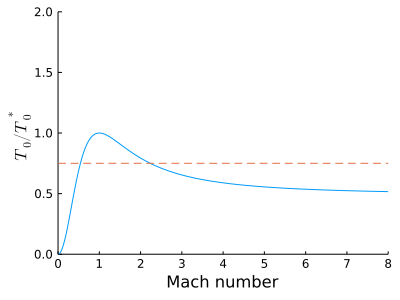

In [11]:
plot(Mrange,T0_over_T0star,xlim=(0,8),ylim=(0,2),xticks=0:1:8,xlabel="Mach number",ylabel=L"T_0/T_0^*",legend=false)
plot!(Mrange,0.75*ones(length(Mrange)),style=:dash)

For example, if $T_0/T_0^* = 0.75$, there are two possible Mach numbers, one subsonic
and one supersonic. The correct one depends on the circumstances.

In [12]:
Msub, Msup = MachNumber(TemperatureRatio(0.75),RayleighFlow,gas=Air)

(MachNumber{Float64}(0.5423261445466405, "MachNumber"), MachNumber{Float64}(2.2360679774997907, "MachNumber"))

In [13]:
Msub

MachNumber = 0.5423261445466405

In [14]:
Msup

MachNumber = 2.2360679774997907

### Example
Suppose the flow of air in a duct enters with velocity 75 m/s at a pressure of
150 kPa and temperature 300 K. We add heat 900 kJ/kg. Find

(a) The value of the Mach number at the entrance and exit

(b) The velocity, pressure, and temperature at the exit

(c) The maximum amount of heat we can add so that the flow is just choked

Set the given values

In [15]:
u1 = Velocity(75u"m/s")
p1 = Pressure(150u"kPa")
T1 = Temperature(300)
q = HeatFlux(900u"kJ/kg")

HeatFlux = 900000.0 J kg⁻¹

We can immediately find the Mach number at the location 1, by finding $c_1$:

In [16]:
c1 = SoundSpeed(T1,gas=Air)
M1 = MachNumber(u1/c1)

MachNumber = 0.216020849610405

Now, use $M_1$ and $T_1$ to find $T_{01}$.

In [17]:
T01 = StagnationTemperature(T1,M1,Isentropic,gas=Air)

StagnationTemperature = 302.79990044798404 K

Now let's focus on state 2. We will use the basic relation $h_{02} = h_{01} + q$
to determine $T_{02}$.

In [18]:
h01 = StagnationEnthalpy(T01,gas=Air)
h02 = StagnationEnthalpy(h01+q)
T02 = StagnationTemperature(h02,gas=Air)

StagnationTemperature = 1198.768043802887 K

To get the other states at location 2, we need the sonic reference conditions.
For example, we will find

$$T_{02}/T_{0}^*$$
to determine $M_2$. We get this by calculating

$$T_{0}^* = T_{01}/(T_{01}/T_{0}^*)$$

In [19]:
T0star = StagnationTemperature(T01/T0OverT0Star(M1,RayleighFlow,gas=Air))

StagnationTemperature = 1520.0497967479669 K

In [20]:
T02_over_T0star = TemperatureRatio(T02/T0star)

TemperatureRatio = 0.788637350149687

In [21]:
M2sub, M2sup = MachNumber(T02_over_T0star,RayleighFlow,gas=Air)

(MachNumber{Float64}(0.5733204685023365, "MachNumber"), MachNumber{Float64}(2.0239173983089973, "MachNumber"))

The subsonic one is the only possible candidate, because the flow came in at
subsonic speed and can't have passed through Mach number 1. Thus

In [22]:
M2 = M2sub

MachNumber = 0.5733204685023365

We have increased the Mach number from 0.216 to 0.573 by adding heat.

Now find the other reference states that we will use:

In [23]:
pstar = Pressure(p1/POverPStar(M1,RayleighFlow,gas=Air))
ustar = Velocity(u1/VOverVStar(M1,RayleighFlow,gas=Air))
Tstar = Temperature(T1/TOverTStar(M1,RayleighFlow,gas=Air))

Temperature = 1266.708163956639 K

and now the values themselves. For example, we use $M_2$ to calculate $p_2/p^*$
and then calculate $p_2 = p^*(p_2/p^*)$.

In [24]:
p2 = Pressure(pstar*POverPStar(M2,RayleighFlow,gas=Air))

Pressure = 109438.70572689772 Pa

In [25]:
u2 = Velocity(ustar*VOverVStar(M2,RayleighFlow,gas=Air))

Velocity = 385.4291055034761 m s⁻¹

In [26]:
T2 = Temperature(Tstar*TOverTStar(M2,RayleighFlow,gas=Air))

Temperature = 1124.822998820702 K

Finally, let us calculate the maximum heat flux -- the heat flux that brings the
flow just to sonic conditions when starting at the given conditions at location 1.
This comes from

$$q_{max} = h_{0}^* - h_{01} = c_p (T_0^* - T_{01})$$

We have a convenience function for that, based on stagnation temperature:

In [27]:
qmax = HeatFlux(T01,T0star,gas=Air)

HeatFlux = 1.2227275208333328e6 J kg⁻¹

In [28]:
value(qmax,u"kJ/kg")

1222.7275208333328 kJ kg⁻¹

Thus, we can add up to 1223 kJ/kg before the flow gets choked. Any more than that
will cause the entrance conditions to change.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*